# MSA 2024 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

## 1. Find all variables and understand them

### W store feature

In [2]:
w_features_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/0. Resources/datasets/W store sales/features.csv')
w_features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [68]:
print(w_features_df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [3]:
w_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
w_features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
print(f"Stores are {w_features_df['Store'].unique()}")
print(f"Number of store is {w_features_df['Store'].nunique()}")
print(f"Dates are {w_features_df['Date'].unique()}")
print(f"Number of date is {w_features_df['Date'].nunique()}")

Stores are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Number of store is 45
Dates are ['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010-10-15' '2010-10-22' '2010-10-29' '2010-11-05'
 '2010-11-12' '2010-11-19' '2010-11-26' '2010-12-03' '2010-12-10'
 '2010-12-17' '2010-12-24' '2010-12-31' '2011-01-07' '2011-01-14'
 '2011-01-21' '2011-01-28' '2011-02-04' '2011-02-11' '2011-02-18'
 '2011-02-25' '2011-03-04' '2011-03-11' '2011-03-18' '2011-03-25'
 '2011-04-01' '2011-04-08' 

### W store sales

In [6]:
w_sales_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/0. Resources/datasets/W store sales/sales.csv')
w_sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [69]:
print(w_sales_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [7]:
w_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
w_sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
print(f"Departments are {w_sales_df['Dept'].unique()}")
print(f"Number of department is {w_sales_df['Dept'].nunique()}")
print(f"Dates are {w_sales_df['Date'].unique()}")
print(f"Number of date is {w_sales_df['Date'].nunique()}")

Departments are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
Number of department is 81
Dates are ['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010-10-15' '2010-10-22' '2010-10-29' '2010-11-05'
 '2010-11-12' '2010-11-19' '2010-11-26' '2010-12-03' '2010-12-10'
 '2010-12-17' '2010-12-24' '2010-12-31' '2011-01-07' '2011-01-14'
 '2011-01-21' '2011-01-28' '2011-02-04'

### W stores

In [10]:
w_stores_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/0. Resources/datasets/W store sales/stores.csv')
w_stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [70]:
print(w_stores_df.columns)

Index(['Store', 'Type', 'Size'], dtype='object')


In [11]:
w_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
w_stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [13]:
print(f"Types are {w_stores_df['Type'].unique()}")

Types are ['A' 'B' 'C']


### X store sales

In [14]:
x_sales_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/0. Resources/datasets/X store sales/store_sales.csv', encoding='ISO-8859-1')
x_sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [71]:
print(x_sales_df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day'],
      dtype='object')


In [15]:
x_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [16]:
x_sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [17]:
print(f"Orders are {x_sales_df['Order ID'].unique()}")
print(f"Number of order is {x_sales_df['Order ID'].nunique()}")

Orders are ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'US-2015-151435'
 'CA-2014-110422' 'CA-2017-121258']
Number of order is 1764


## 2. Visualise data

### W store features

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\419167115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='Store', y='Temperature', palette='viridis')


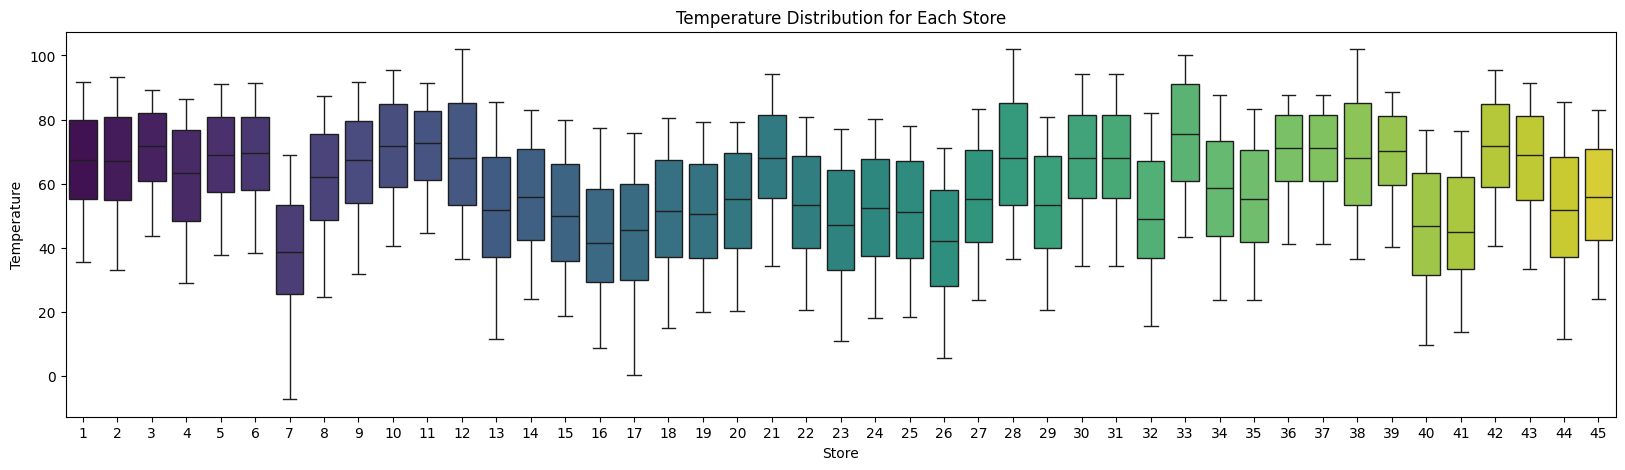

In [18]:
# plot temperature for each store
plt.figure(figsize=(20, 5))
sns.boxplot(data=w_features_df, x='Store', y='Temperature', palette='viridis')
plt.title('Temperature Distribution for Each Store')
plt.xlabel('Store')
plt.ylabel('Temperature')
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\3149663123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='Store', y='Fuel_Price', palette='viridis')


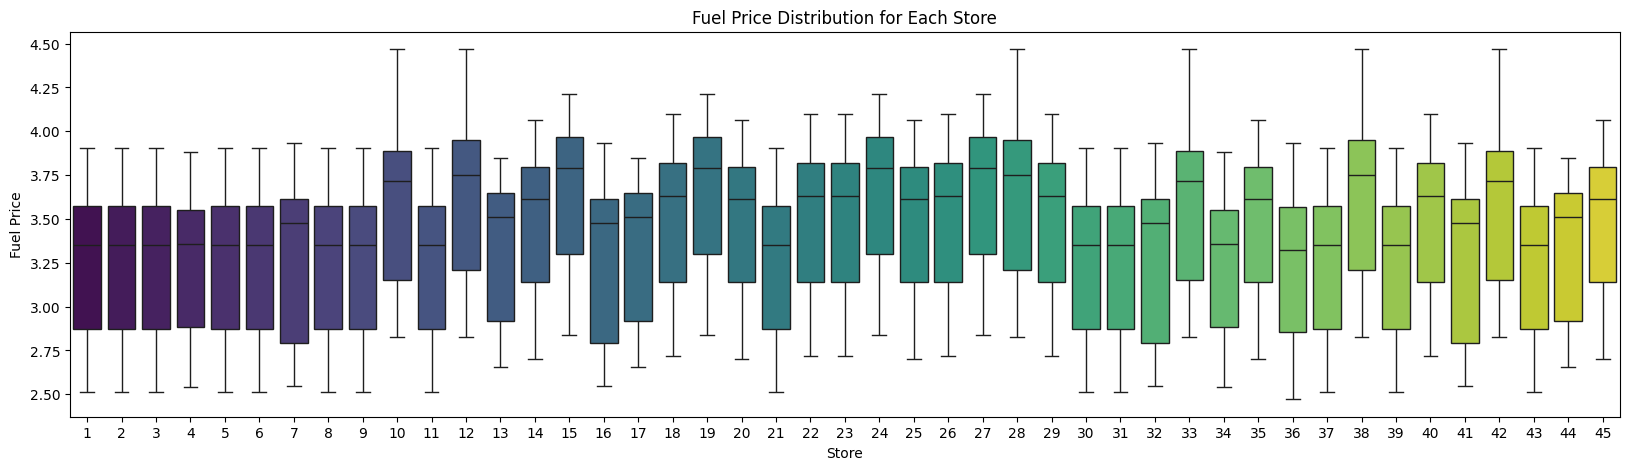

In [19]:
# plot fuel price for each store
plt.figure(figsize=(20, 5))
sns.boxplot(data=w_features_df, x='Store', y='Fuel_Price', palette='viridis')
plt.title('Fuel Price Distribution for Each Store')
plt.xlabel('Store')
plt.ylabel('Fuel Price')
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\2488823602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='Store', y='CPI', palette='viridis')


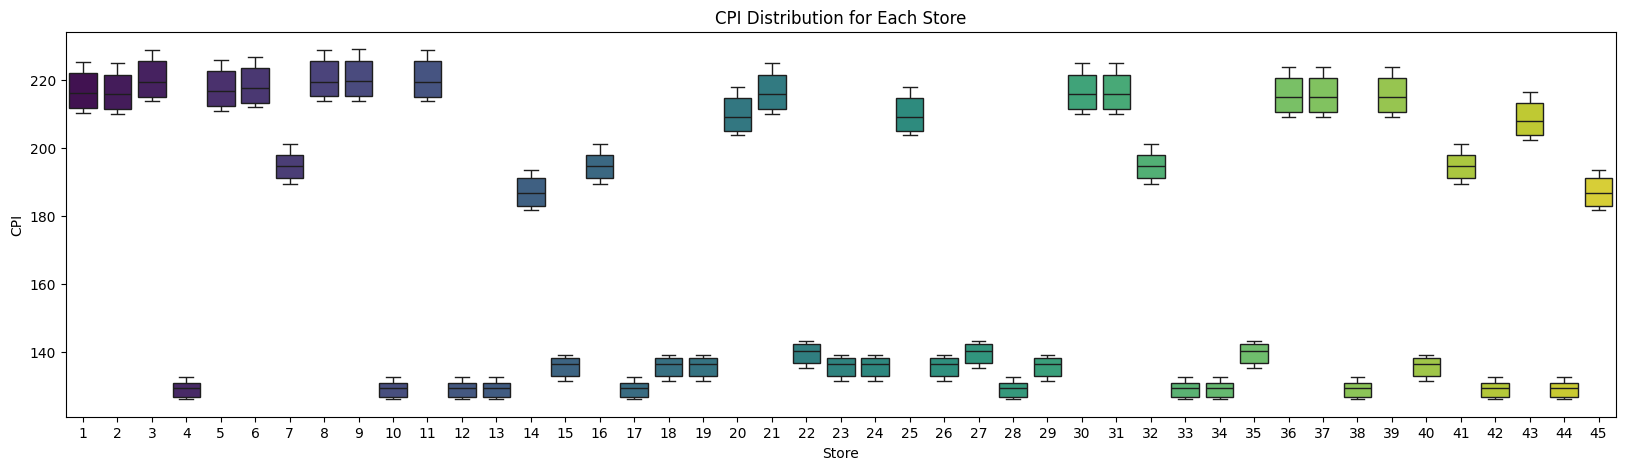

In [20]:
# plot CPI for each store
plt.figure(figsize=(20, 5))
sns.boxplot(data=w_features_df, x='Store', y='CPI', palette='viridis')
plt.title('CPI Distribution for Each Store')
plt.xlabel('Store')
plt.ylabel('CPI')
plt.show()

In [21]:
w_features_df['Date'] = pd.to_datetime(w_features_df['Date'])
print(w_features_df['Date'].dtype)

datetime64[ns]


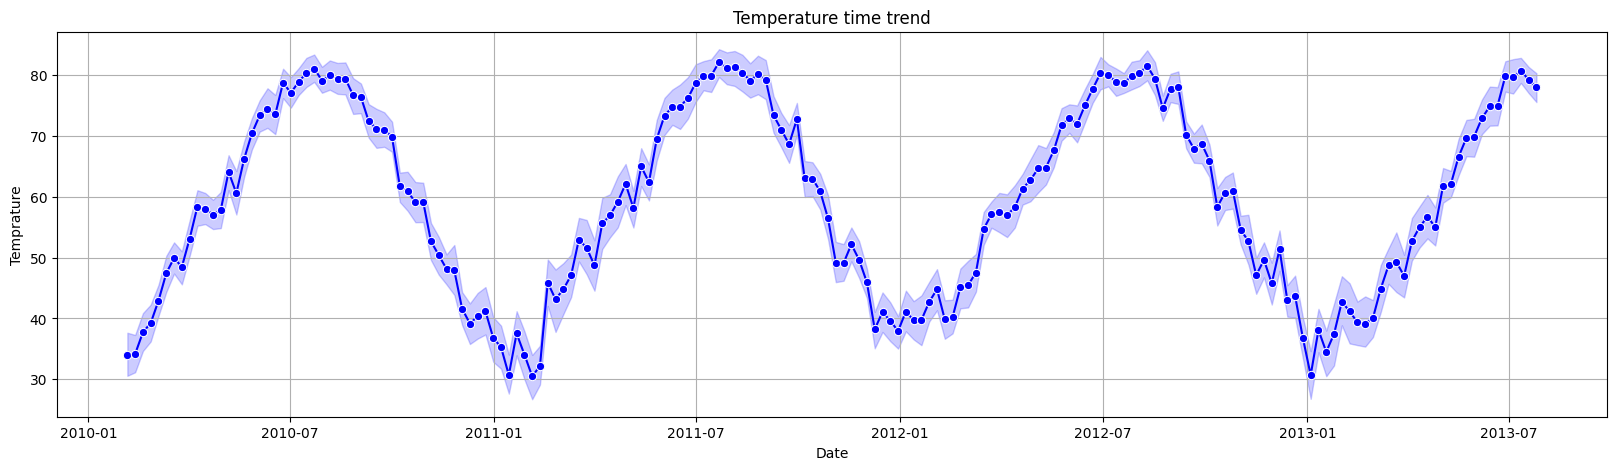

In [22]:
# plot the temperature time trend 
plt.figure(figsize=(20, 5))
sns.lineplot(data=w_features_df, x='Date', y='Temperature', marker='o', color='blue')
plt.title('Temperature time trend')
plt.xlabel('Date')
plt.ylabel('Temprature')
plt.grid(True)
plt.show()

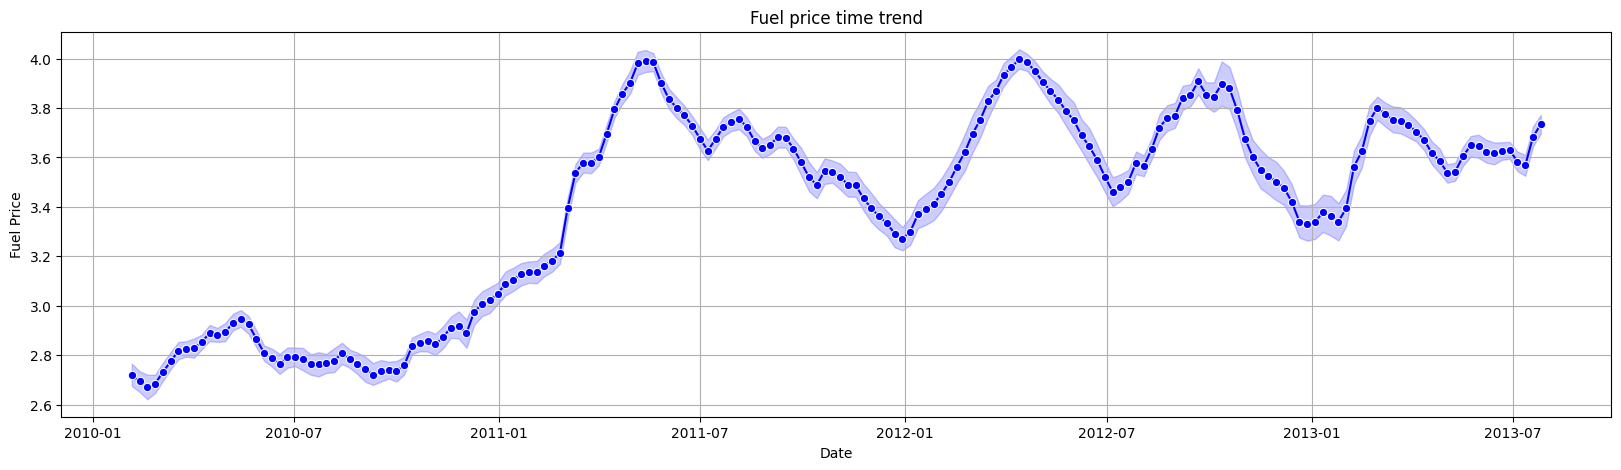

In [23]:
# plot fuel price time trend 
plt.figure(figsize=(20, 5))
sns.lineplot(data=w_features_df, x='Date', y='Fuel_Price', marker='o', color='blue')
plt.title('Fuel price time trend')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.grid(True)
plt.show()

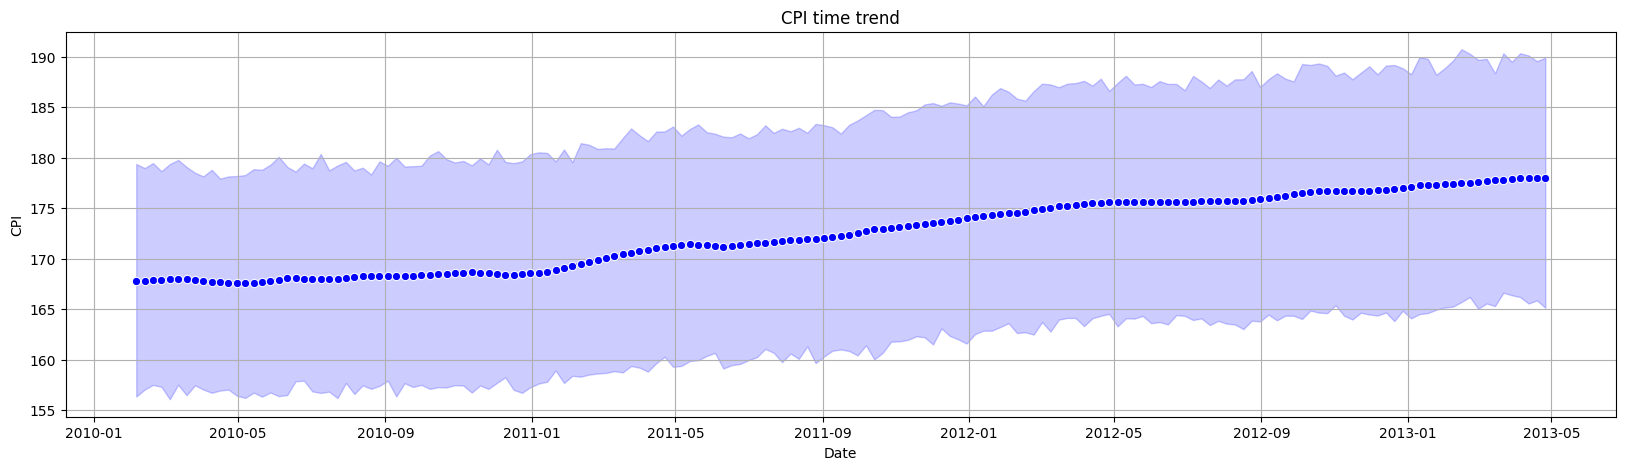

In [24]:
# plot CPI time trend 
plt.figure(figsize=(20, 5))
sns.lineplot(data=w_features_df, x='Date', y='CPI', marker='o', color='blue')
plt.title('CPI time trend')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.show()

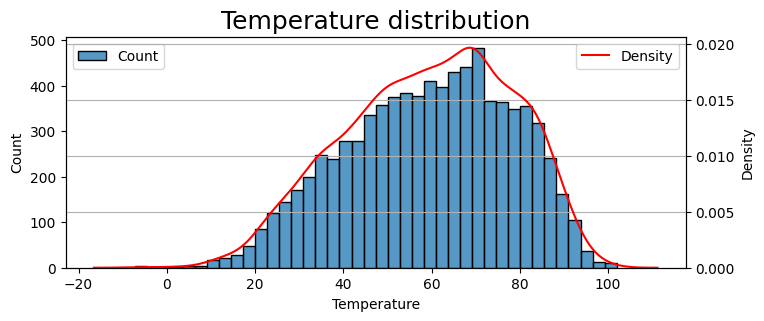

In [25]:
# temperature distribution
fig, ax = plt.subplots(figsize=(8, 3))

sns.histplot(x=w_features_df['Temperature'], ax=ax, label="Count", color="#1f77b4")

ax2 = ax.twinx()
sns.kdeplot(x=w_features_df['Temperature'], ax=ax2, color="red", label="Density")

ax.set_title('Temperature distribution', fontsize=18)
ax.set_xlabel('Temperature')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

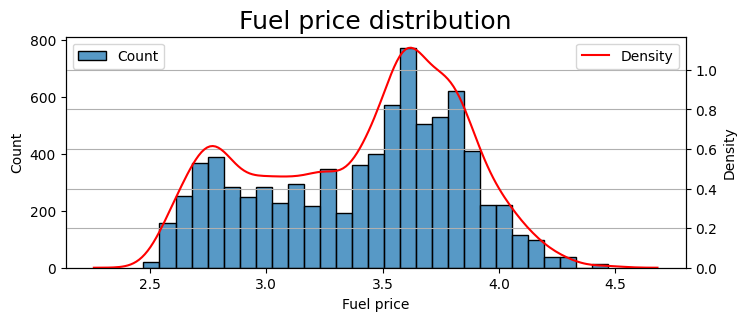

In [26]:
# fuel price distribution
fig, ax = plt.subplots(figsize=(8, 3))

sns.histplot(x=w_features_df['Fuel_Price'], ax=ax, label="Count", color="#1f77b4")

ax2 = ax.twinx()
sns.kdeplot(x=w_features_df['Fuel_Price'], ax=ax2, color="red", label="Density")

ax.set_title('Fuel price distribution', fontsize=18)
ax.set_xlabel('Fuel price')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

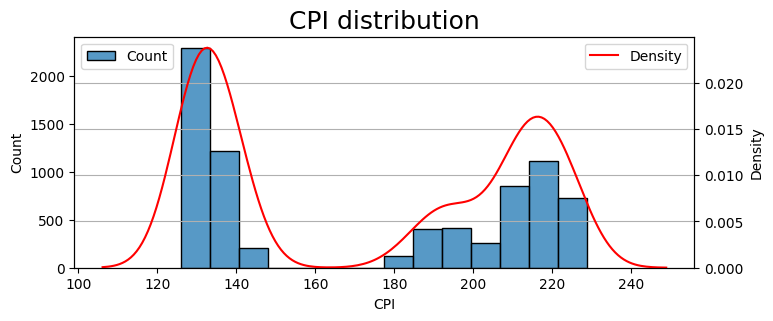

In [27]:
# CPI distribution
fig, ax = plt.subplots(figsize=(8, 3))

sns.histplot(x=w_features_df['CPI'], ax=ax, label="Count", color="#1f77b4")

ax2 = ax.twinx()
sns.kdeplot(x=w_features_df['CPI'], ax=ax2, color="red", label="Density")

ax.set_title('CPI distribution', fontsize=18)
ax.set_xlabel('CPI')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\2578969022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='IsHoliday', y='Temperature', palette='viridis')


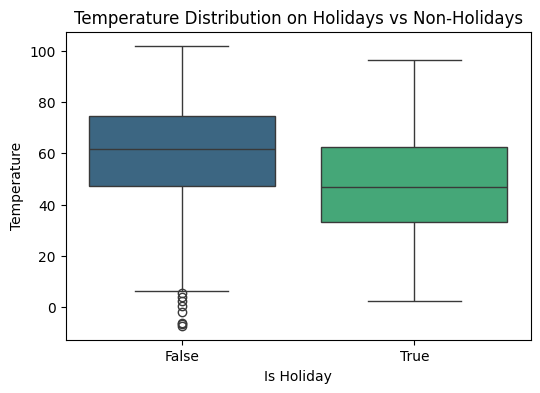

In [28]:
# temeprature is holiday or not
plt.figure(figsize=(6, 4))
sns.boxplot(data=w_features_df, x='IsHoliday', y='Temperature', palette='viridis')
plt.title('Temperature Distribution on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Temperature')
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\4237172672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='IsHoliday', y='Fuel_Price', palette='viridis')


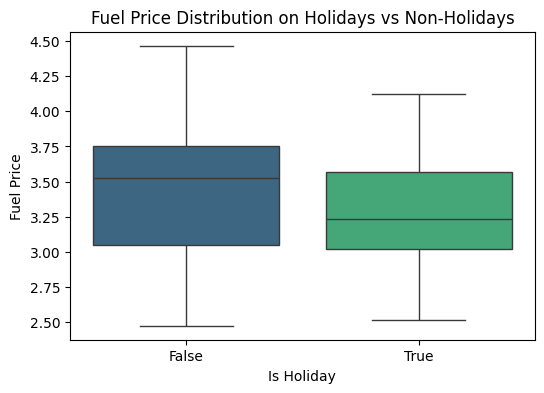

In [29]:
# fuel price is holiday or not
plt.figure(figsize=(6, 4))
sns.boxplot(data=w_features_df, x='IsHoliday', y='Fuel_Price', palette='viridis')
plt.title('Fuel Price Distribution on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Fuel Price')
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\3879163306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_features_df, x='IsHoliday', y='CPI', palette='viridis')


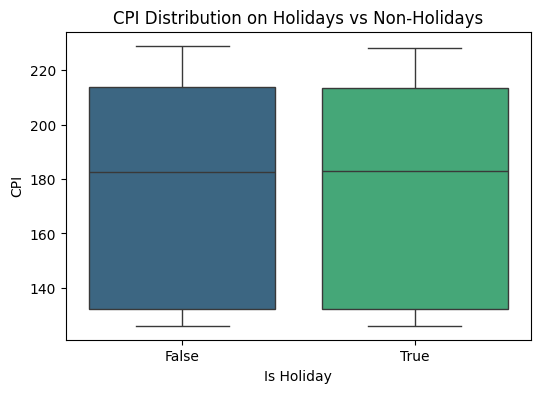

In [30]:
# CPI is holiday or not
plt.figure(figsize=(6, 4))
sns.boxplot(data=w_features_df, x='IsHoliday', y='CPI', palette='viridis')
plt.title('CPI Distribution on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('CPI')
plt.show()

### W store sales

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\1426170427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_sales_df, x='Store', y='Weekly_Sales', palette='viridis')


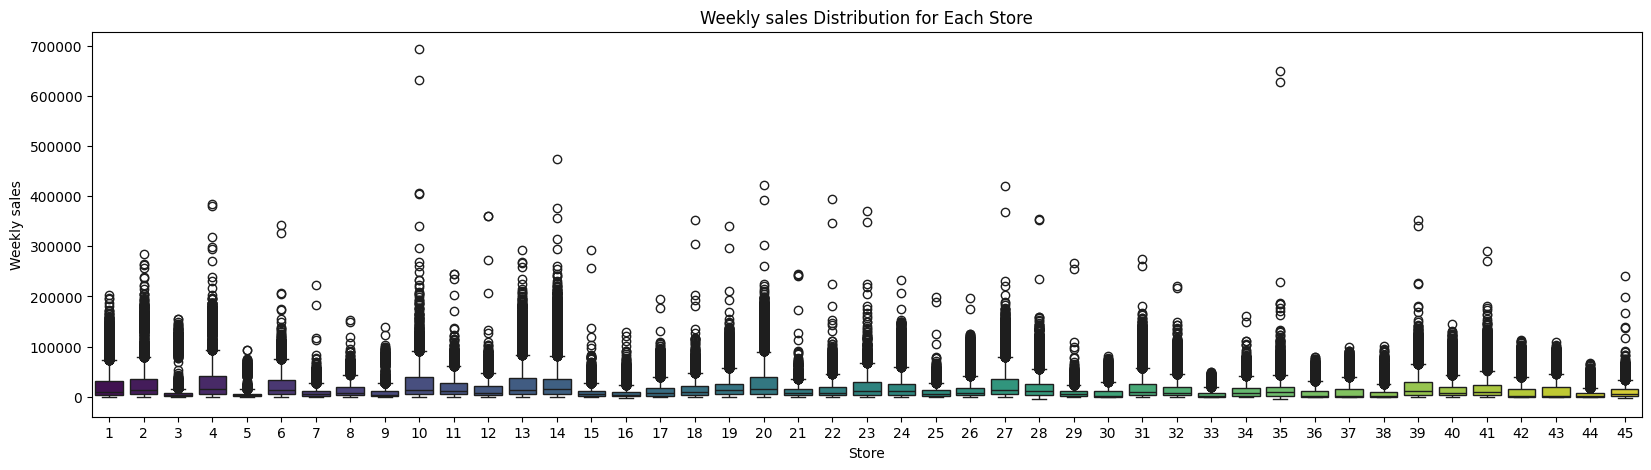

In [31]:
# plot weekly sales for each store
plt.figure(figsize=(20, 5))
sns.boxplot(data=w_sales_df, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Weekly sales Distribution for Each Store')
plt.xlabel('Store')
plt.ylabel('Weekly sales')
plt.show()

In [32]:
w_sales_df['Date'] = pd.to_datetime(w_sales_df['Date'])
print(w_sales_df['Date'].dtype)

datetime64[ns]


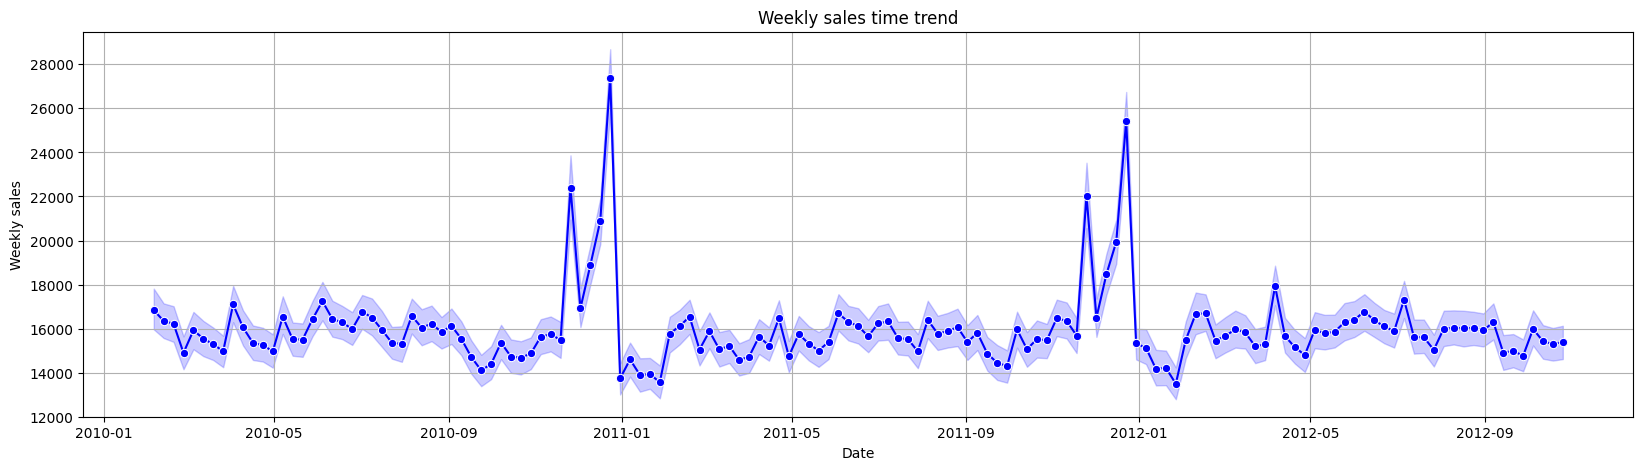

In [33]:
# plot weekly sales time trend 
plt.figure(figsize=(20, 5))
sns.lineplot(data=w_sales_df, x='Date', y='Weekly_Sales', marker='o', color='blue')
plt.title('Weekly sales time trend')
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.grid(True)
plt.show()

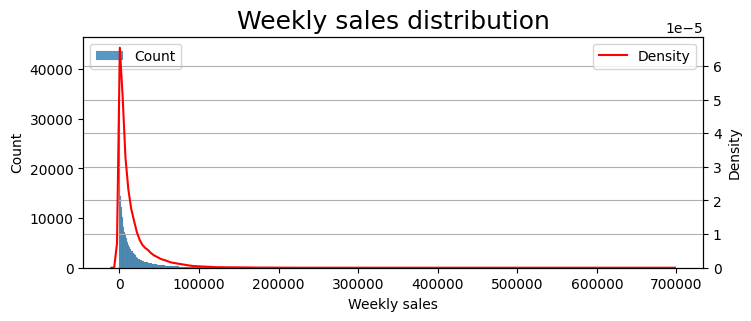

In [34]:
# weekly sales distribution
fig, ax = plt.subplots(figsize=(8, 3))

sns.histplot(x=w_sales_df['Weekly_Sales'], ax=ax, label="Count", color="#1f77b4")

ax2 = ax.twinx()
sns.kdeplot(x=w_sales_df['Weekly_Sales'], ax=ax2, color="red", label="Density")

ax.set_title('Weekly sales distribution', fontsize=18)
ax.set_xlabel('Weekly sales')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\1981308239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_sales_df, x='IsHoliday', y='Weekly_Sales', palette='viridis')


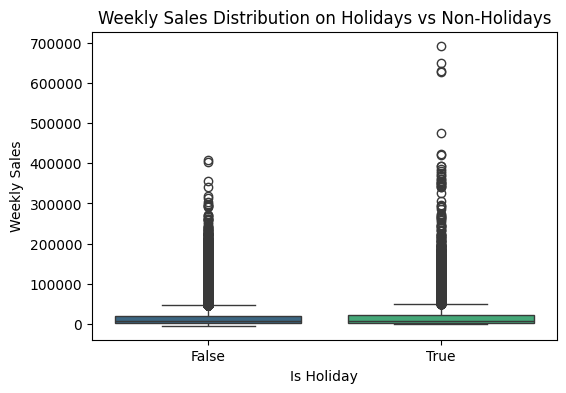

In [35]:
# weekly sales is holiday or not
plt.figure(figsize=(6, 4))
sns.boxplot(data=w_sales_df, x='IsHoliday', y='Weekly_Sales', palette='viridis')
plt.title('Weekly Sales Distribution on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

### W Stores

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\3639276693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=w_stores_df, x='Type', palette='viridis')


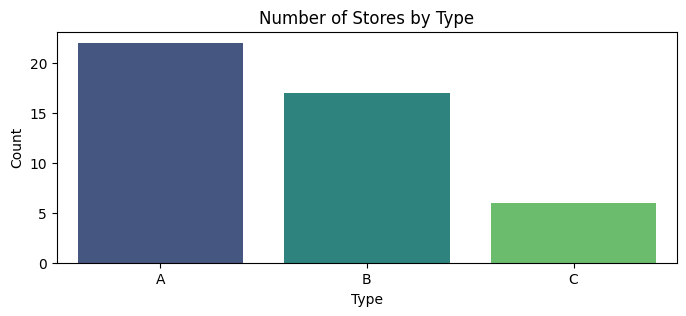

In [36]:
# different store types
plt.figure(figsize=(8, 3))
sns.countplot(data=w_stores_df, x='Type', palette='viridis')
plt.title('Number of Stores by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\Alvin Zhao\AppData\Local\Temp\ipykernel_14844\1962046600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_stores_df, x='Type', y='Size', palette='viridis')


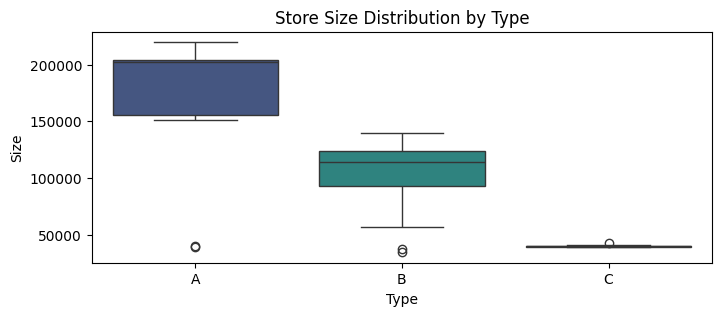

In [37]:
# distribution of different type stores
plt.figure(figsize=(8, 3))
sns.boxplot(data=w_stores_df, x='Type', y='Size', palette='viridis')
plt.title('Store Size Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.show()

### X store sales

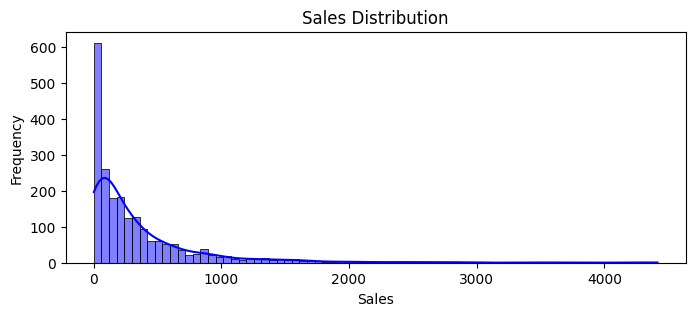

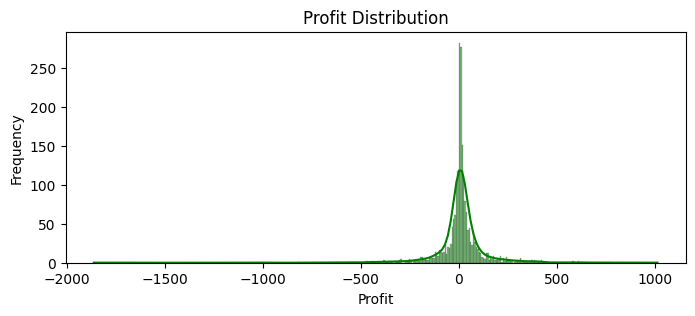

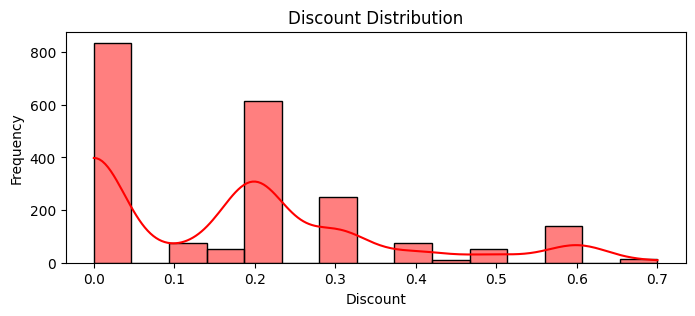

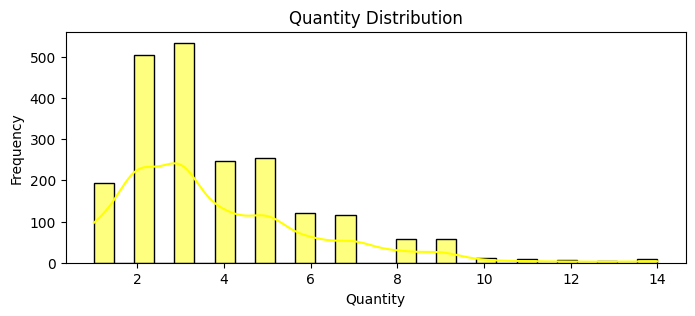

In [38]:
# sales distribution
plt.figure(figsize=(8, 3))
sns.histplot(x_sales_df['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# profit distribution
plt.figure(figsize=(8, 3))
sns.histplot(x_sales_df['Profit'], kde=True, color='green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# discount distribution
plt.figure(figsize=(8, 3))
sns.histplot(x_sales_df['Discount'], kde=True, color='red')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

# quatity distribution
plt.figure(figsize=(8, 3))
sns.histplot(x_sales_df['Quantity'], kde=True, color='yellow')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [39]:
x_sales_df['Order Date'] = pd.to_datetime(x_sales_df['Order Date'])
x_sales_df['Ship Date'] = pd.to_datetime(x_sales_df['Ship Date'])

# order number by month
x_sales_df['Order Month'] = x_sales_df['Order Date'].dt.to_period('M')
order_trend = x_sales_df.groupby('Order Month').size()
x_sales_df = x_sales_df.drop(columns=['Order Month'])

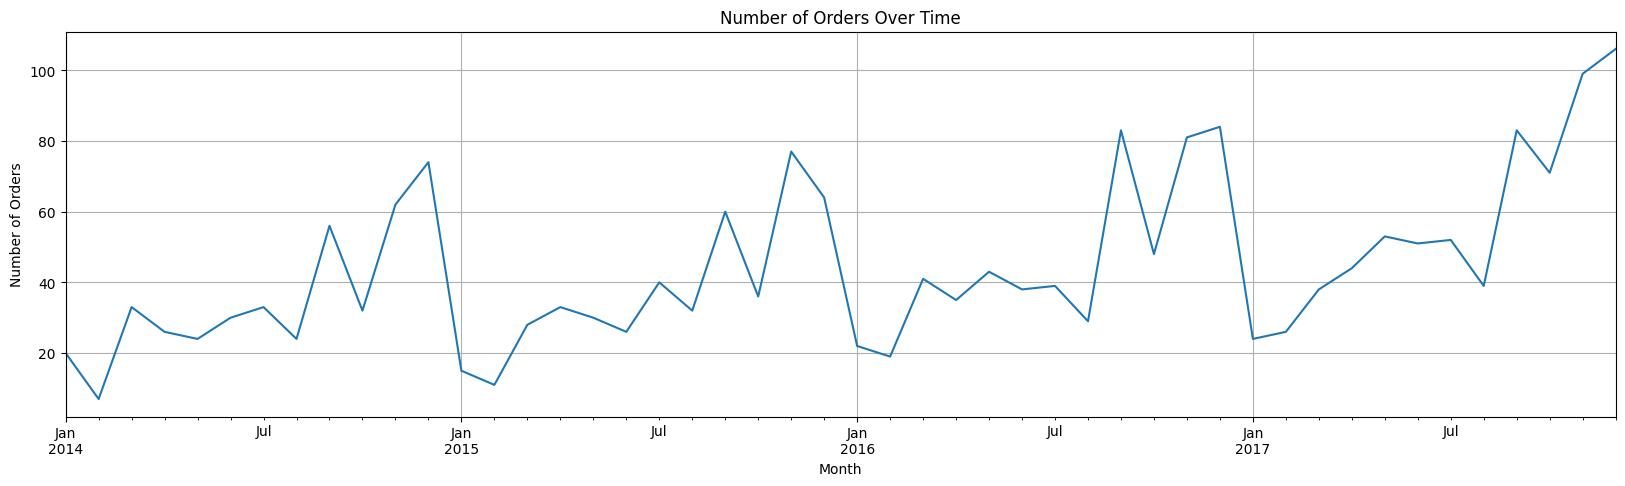

In [40]:
#plot the number of orders over time
plt.figure(figsize=(20, 5))
order_trend.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [41]:
category_sales_profit = x_sales_df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
category_sales_profit_melted = category_sales_profit.melt(id_vars='Sub-Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

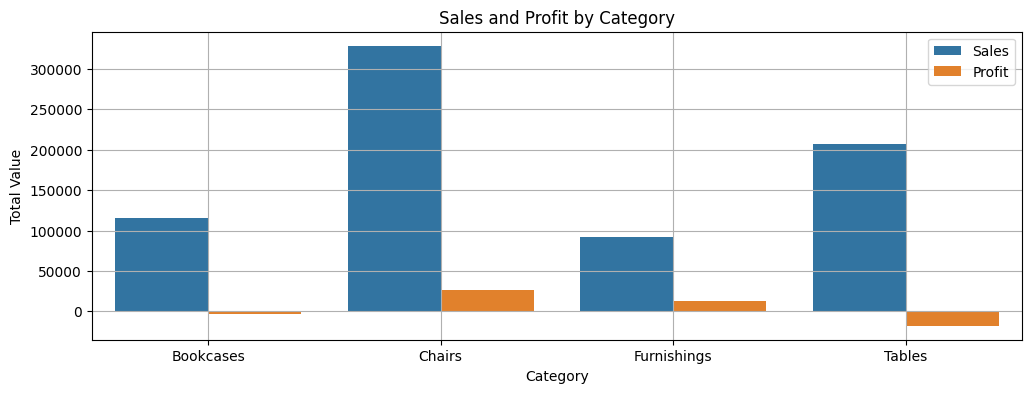

In [42]:
# sales and profit by category
plt.figure(figsize=(12, 4))
sns.barplot(data=category_sales_profit_melted, x='Sub-Category', y='Value', hue='Metric', dodge=True)
plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.show()

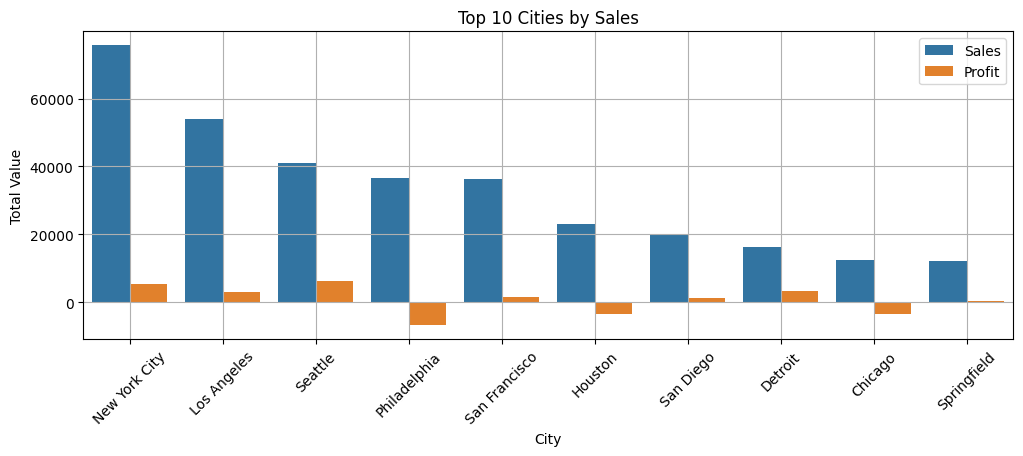

In [43]:
customer_sales_profit = x_sales_df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10).reset_index()
customer_sales_profit_melted = customer_sales_profit.melt(id_vars='City', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

# sales and profit by city
plt.figure(figsize=(12, 4))
sns.barplot(data=customer_sales_profit_melted, x='City', y='Value', hue='Metric', dodge=True)
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

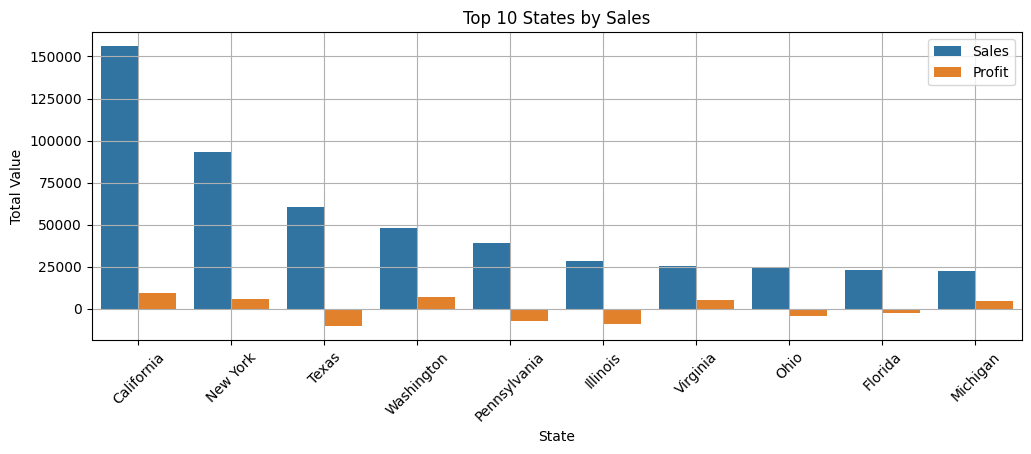

In [44]:
customer_sales_profit = x_sales_df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10).reset_index()
customer_sales_profit_melted = customer_sales_profit.melt(id_vars='State', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

# sales and profit by state
plt.figure(figsize=(12, 4))
sns.barplot(data=customer_sales_profit_melted, x='State', y='Value', hue='Metric', dodge=True)
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

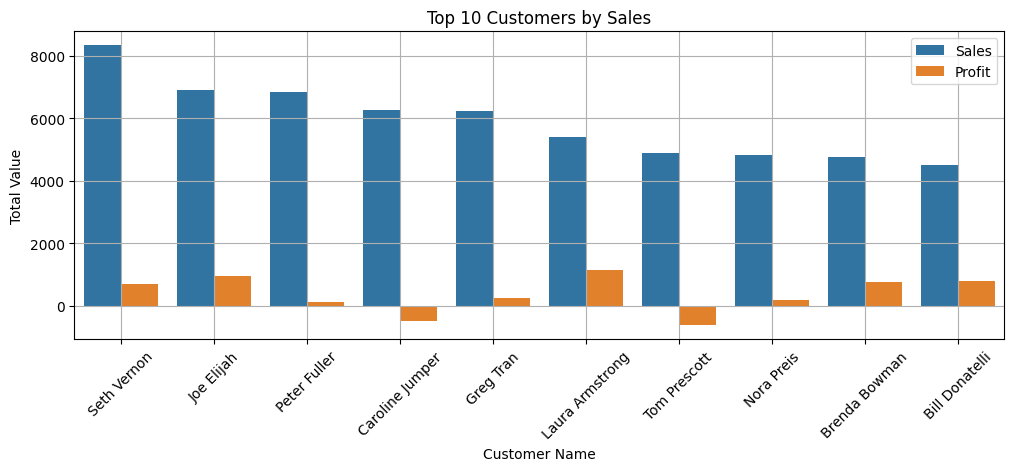

In [45]:
customer_sales_profit = x_sales_df.groupby('Customer Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10).reset_index()
customer_sales_profit_melted = customer_sales_profit.melt(id_vars='Customer Name', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')

# sales and profit by customer
plt.figure(figsize=(12, 4))
sns.barplot(data=customer_sales_profit_melted, x='Customer Name', y='Value', hue='Metric', dodge=True)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 3. Clean data

### Combine W features, sales, and stores dataset into one whole dataset

In [46]:
print(w_features_df.columns)
print(w_sales_df.columns)
print(w_stores_df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [47]:
# calculate all departments of one store based on store and date
weekly_sales = w_sales_df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# combine as a new dataframe
w_combined_df = pd.merge(w_features_df, weekly_sales, on=['Store', 'Date'], how='left')
w_combined_df = pd.merge(w_combined_df, w_stores_df, on=['Store'], how='left')
w_combined_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,B,118221


In [72]:
print(w_combined_df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Day'],
      dtype='object')


### Finding missing value

In [48]:
# find the number of missing value in each column of W store dataset
null_values = w_combined_df.isnull().sum()
print(null_values)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Weekly_Sales    1755
Type               0
Size               0
dtype: int64


In [49]:
# find the number of missing value in each column of X store dataset
null_values = x_sales_df.isnull().sum()
print(null_values)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


<Axes: >

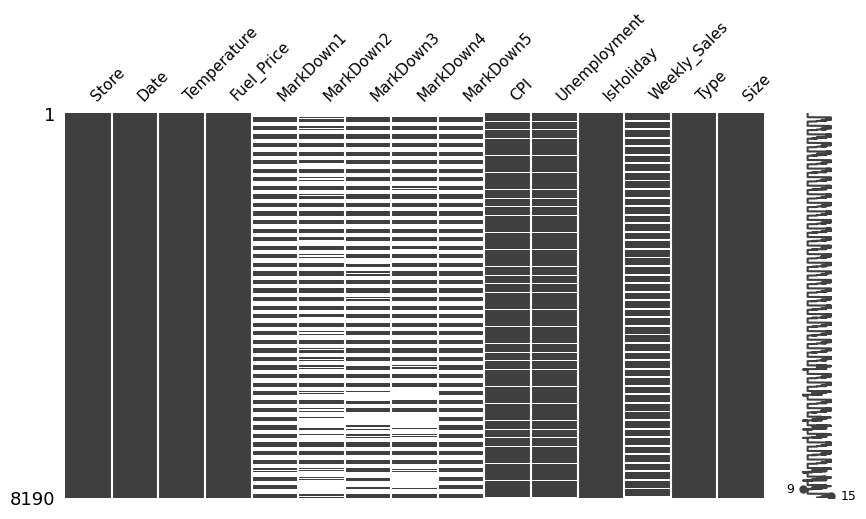

In [50]:
# visualise the missing values for W store
import missingno as msno
msno.matrix(w_combined_df, figsize=(10,5), fontsize=11)

### Finding outliers

In [51]:
# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

In [52]:
# find outliers for W store dataset
outliers = w_combined_df.select_dtypes(include='number').apply(detect_outliers)
print(outliers.sum())

Store             0
Temperature       7
Fuel_Price        0
MarkDown1       237
MarkDown2       436
MarkDown3       480
MarkDown4       337
MarkDown5       212
CPI               0
Unemployment    386
Weekly_Sales     34
Size              0
dtype: int64


In [53]:
# find outliers for X store dataset
outliers = x_sales_df.select_dtypes(include='number').apply(detect_outliers)
print(outliers.sum())

Row ID           0
Postal Code      0
Sales          164
Quantity        39
Discount         0
Profit         407
dtype: int64


### Feature Engineering

In [54]:
# W store: extract year, month, and day from date column
w_combined_df['Year'] = w_combined_df['Date'].dt.year
w_combined_df['Month'] = w_combined_df['Date'].dt.month
w_combined_df['Day'] = w_combined_df['Date'].dt.day
w_combined_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Size,Year,Month,Day
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90,A,151315,2010,2,5
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44,A,151315,2010,2,12
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17,A,151315,2010,2,19
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59,A,151315,2010,2,26
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68,A,151315,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,B,118221,2013,6,28
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,B,118221,2013,7,5
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,B,118221,2013,7,12
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,B,118221,2013,7,19


In [55]:
# X store: extract year, month, and day from date column
x_sales_df['Order Year'] = x_sales_df['Order Date'].dt.year
x_sales_df['Order Month'] = x_sales_df['Order Date'].dt.month
x_sales_df['Order Day'] = x_sales_df['Order Date'].dt.day
x_sales_df['Ship Year'] = x_sales_df['Ship Date'].dt.year
x_sales_df['Ship Month'] = x_sales_df['Ship Date'].dt.month
x_sales_df['Ship Day'] = x_sales_df['Ship Date'].dt.day
x_sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,11,8,2016,11,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,11,8,2016,11,11
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,10,11,2015,10,18
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,48.8600,7,0.00,14.1694,2014,6,9,2014,6,14
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,1706.1840,9,0.20,85.3092,2014,6,9,2014,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,383.4656,4,0.32,-67.6704,2015,3,19,2015,3,22
2117,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,13.4000,1,0.00,6.4320,2016,12,5,2016,12,10
2118,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,85.9800,1,0.00,22.3548,2015,9,6,2015,9,9
2119,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,2014,1,21,2014,1,23


### Non-numerical and categorical columns

In [56]:
# find non-numeric columns of W store
w_n_num_col = list(w_combined_df.select_dtypes(exclude='number').columns)
w_num_col = list(w_combined_df.select_dtypes(include='number').columns)
print(w_n_num_col)
print(w_num_col)
print(w_combined_df.dtypes)

['Date', 'IsHoliday', 'Type']
['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales', 'Size', 'Year', 'Month', 'Day']
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Weekly_Sales           float64
Type                    object
Size                     int64
Year                     int32
Month                    int32
Day                      int32
dtype: object


In [57]:
# find non-numeric columns of X store
x_n_num_col = list(x_sales_df.select_dtypes(exclude='number').columns)
x_num_col = list(x_sales_df.select_dtypes(include='number').columns)
print(x_n_num_col)
print(x_num_col)
print(x_sales_df.dtypes)

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day']
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit            

### 3.4 Data preprocessing pipeline

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [59]:
# Outlier handler
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # replace as median
        X_df = pd.DataFrame(X)
        self.medians_ = X_df.median()
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X)

        def detect_outliers(column):
            Q1 = column.quantile(0.25)
            Q3 = column.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return (column < lower_bound) | (column > upper_bound)
        
        for col in X_df.columns:
            outliers = detect_outliers(X_df[col])
            X_df.loc[outliers, col] = self.medians_[col]
        
        return X_df.values

In [60]:
# W store
# fill the missing values of label using median
w_combined_df['Weekly_Sales'] = w_combined_df['Weekly_Sales'].fillna(w_combined_df['Weekly_Sales'].median())

# drop the label
X = w_combined_df.drop(columns=['Weekly_Sales', 'Date'])
y = w_combined_df['Weekly_Sales']

# define numberic and non-numberic features
numeric_features = ['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                    'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 
                    'Size', 'Year', 'Month', 'Day']
categorical_features = ['IsHoliday', 'Type']

# create pipeline
numeric_transformer = Pipeline(steps=[
    ('outlier_handler', OutlierHandler()), # outliers handling
    ('imputer', SimpleImputer(strategy='median')), # impute missing values using median
    # ('scaler', RobustScaler()) # impletment data scaling later based on different algorithms 
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')), # convert categorical features to numeric features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_preprocessed = pipeline.fit_transform(X)

print(X_preprocessed)

[[ 1.    42.31   2.572 ...  1.     0.     0.   ]
 [ 1.    38.51   2.548 ...  1.     0.     0.   ]
 [ 1.    39.93   2.514 ...  1.     0.     0.   ]
 ...
 [45.    79.37   3.614 ...  0.     1.     0.   ]
 [45.    82.84   3.737 ...  0.     1.     0.   ]
 [45.    76.06   3.804 ...  0.     1.     0.   ]]


In [61]:
# features name after preprocessing
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
w_prepared_df = pd.concat([w_combined_df['Date'].reset_index(drop=True), X_preprocessed_df, y.reset_index(drop=True)], axis=1)

# W store dataframe after data preprocessing
w_prepared_df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,Year,Month,Day,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Weekly_Sales
0,2010-02-05,1.0,42.31,2.572,4740.545,364.57,36.26,1176.0925,2726.2075,211.096358,...,151315.0,2010.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,1643690.90
1,2010-02-12,1.0,38.51,2.548,4740.545,364.57,36.26,1176.0925,2726.2075,211.242170,...,151315.0,2010.0,2.0,12.0,0.0,1.0,1.0,0.0,0.0,1641957.44
2,2010-02-19,1.0,39.93,2.514,4740.545,364.57,36.26,1176.0925,2726.2075,211.289143,...,151315.0,2010.0,2.0,19.0,1.0,0.0,1.0,0.0,0.0,1611968.17
3,2010-02-26,1.0,46.63,2.561,4740.545,364.57,36.26,1176.0925,2726.2075,211.319643,...,151315.0,2010.0,2.0,26.0,1.0,0.0,1.0,0.0,0.0,1409727.59
4,2010-03-05,1.0,46.50,2.625,4740.545,364.57,36.26,1176.0925,2726.2075,211.350143,...,151315.0,2010.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,2013-06-28,45.0,76.05,3.639,4842.290,975.03,3.00,2449.9700,3169.6900,182.764003,...,118221.0,2013.0,6.0,28.0,1.0,0.0,0.0,1.0,0.0,960746.04
8186,2013-07-05,45.0,77.50,3.614,9090.480,2268.58,36.26,5797.4700,1514.9300,182.764003,...,118221.0,2013.0,7.0,5.0,1.0,0.0,0.0,1.0,0.0,960746.04
8187,2013-07-12,45.0,79.37,3.614,3789.940,1827.31,85.72,744.8400,2150.3600,182.764003,...,118221.0,2013.0,7.0,12.0,1.0,0.0,0.0,1.0,0.0,960746.04
8188,2013-07-19,45.0,82.84,3.737,2961.490,1047.07,204.19,363.0000,1059.4600,182.764003,...,118221.0,2013.0,7.0,19.0,1.0,0.0,0.0,1.0,0.0,960746.04


In [62]:
w_prepared_df.to_csv('w_store_dataset.csv')

In [63]:
# X store
# drop the label
X = x_sales_df.drop(columns=['Profit', 'Order Date', 'Ship Date', 'Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Customer Name', 'Product Name'])
y = x_sales_df['Profit']

# define numberic and non-numberic features
numeric_features = ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day']
categorical_features = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']

# create pipeline
numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')), # no missing values
    ('outlier_handler', OutlierHandler()), # outliers handling
    # ('scaler', RobustScaler()) # implement data scaling later based on different algorithoms
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)), # convert categorical features to numeric features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_preprocessed = pipeline.fit_transform(X)

print(X_preprocessed)

[[4.242000e+04 2.619600e+02 2.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [4.242000e+04 7.319400e+02 3.000000e+00 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 [3.331100e+04 9.575775e+02 5.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 ...
 [7.050600e+04 8.598000e+01 1.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [3.318000e+04 2.524800e+01 3.000000e+00 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 [9.262700e+04 9.196000e+01 2.000000e+00 ... 0.000000e+00 1.000000e+00
  0.000000e+00]]


In [64]:
# features name after preprocessing
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
x_prepared_df = pd.concat([x_sales_df['Order Date'].reset_index(drop=True), x_sales_df['Ship Date'].reset_index(drop=True), X_preprocessed_df, y.reset_index(drop=True)], axis=1)

# X store dataframe after data preprocessing
x_prepared_df

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Order Year,Order Month,Order Day,Ship Year,...,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Profit
0,2016-11-08,2016-11-11,42420.0,261.9600,2.0,0.00,2016.0,11.0,8.0,2016.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,41.9136
1,2016-11-08,2016-11-11,42420.0,731.9400,3.0,0.00,2016.0,11.0,8.0,2016.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,219.5820
2,2015-10-11,2015-10-18,33311.0,957.5775,5.0,0.45,2015.0,10.0,11.0,2015.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-383.0310
3,2014-06-09,2014-06-14,90032.0,48.8600,7.0,0.00,2014.0,6.0,9.0,2014.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,14.1694
4,2014-06-09,2014-06-14,90032.0,182.2200,9.0,0.20,2014.0,6.0,9.0,2014.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2015-03-19,2015-03-22,77041.0,383.4656,4.0,0.32,2015.0,3.0,19.0,2015.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-67.6704
2117,2016-12-05,2016-12-10,19711.0,13.4000,1.0,0.00,2016.0,12.0,5.0,2016.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.4320
2118,2015-09-06,2015-09-09,70506.0,85.9800,1.0,0.00,2015.0,9.0,6.0,2015.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.3548
2119,2014-01-21,2014-01-23,33180.0,25.2480,3.0,0.20,2014.0,1.0,21.0,2014.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.1028


In [65]:
x_prepared_df.to_csv('x_store_dataset.csv')

## 4. Identify correlated variables

### W store

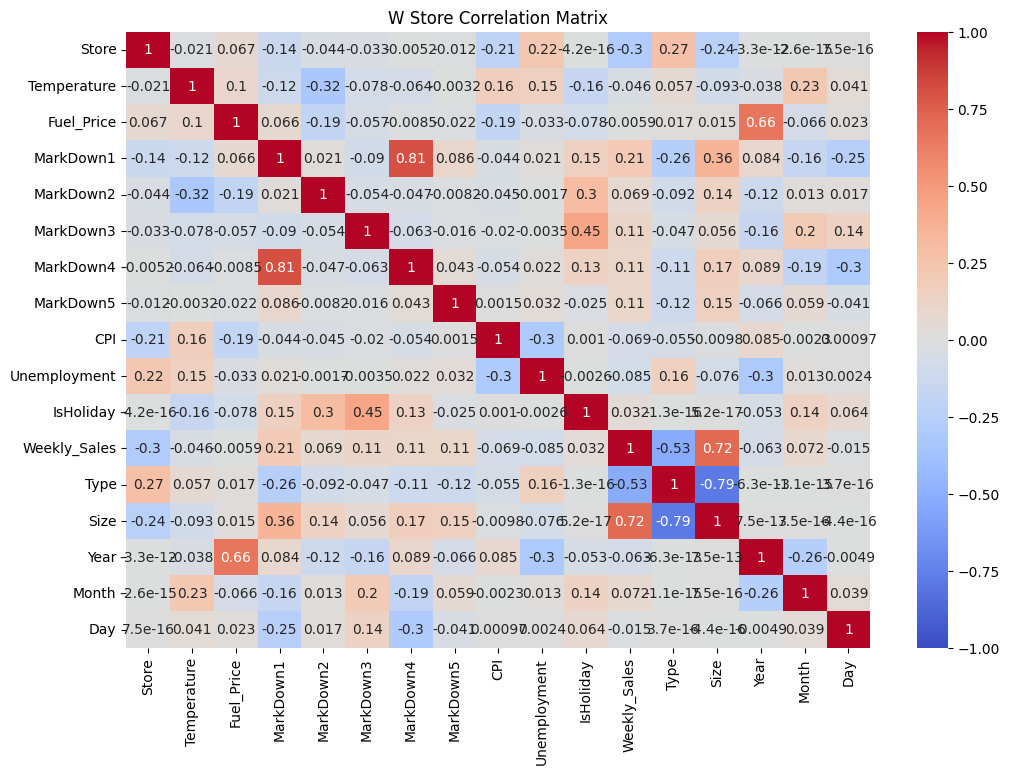

In [66]:
# delete Date column
w_combined_df01 = w_combined_df.drop(columns=['Date']) 
# convert categorical features to numeric features
label_encoder = LabelEncoder()
w_combined_df01['IsHoliday'] = w_combined_df01['IsHoliday'].astype(int)
w_combined_df01['Type'] = label_encoder.fit_transform(w_combined_df01['Type'])

corr_matrix = w_combined_df01.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('W Store Correlation Matrix')
plt.show()

### X store

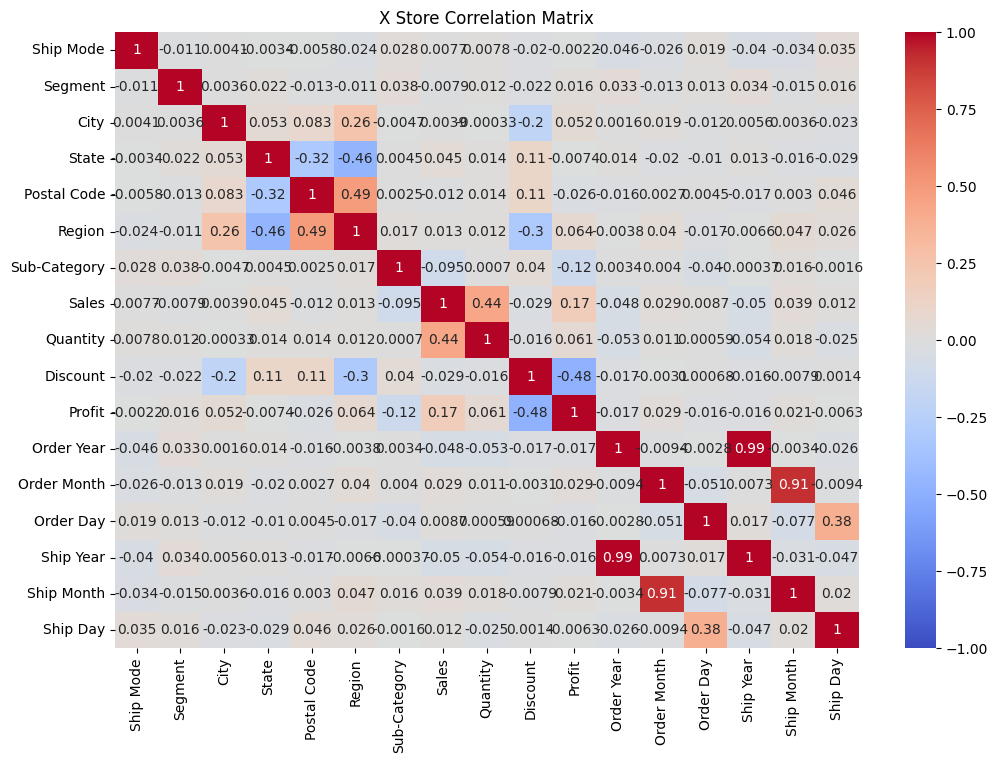

In [67]:
# delete ID, Date, and Name columns
x_sales_df01 = x_sales_df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Country', 'Category'])

# transfer categorical features to numeric features
label_encoder = LabelEncoder()
categorical_features = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Sub-Category']
for feature in categorical_features:
    x_sales_df01[feature] = label_encoder.fit_transform(x_sales_df01[feature])

corr_matrix = x_sales_df01.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('X Store Correlation Matrix')
plt.show()

## 5. Summary

### Visualising data

<ol>
    <li>For W stores, there are obvious differences between different stores for CPI distribution.</li>
    <li>For W stores, there is a seasonal trend for temperature time trend.</li>
    <li>For W stores, the data of features and label have several types of data distribution.</li>
    <li>For W stores, holidays have lower temperature and lower fuel price.</li>
    <li>For W stores, the descending order of store number and size is A, B, and C.</li>
    <li>For X stores, the numeric features have several types of data distribution.</li>
    <li>For X stores, there is a seasonal trend for the number of orders.</li>
    <li>For X stores, chairs have the highest sales and profit.</li>
    <li>For X stores, New York is the city with the highest sales, Seattle is the city with the highest profit.</li>
    <li>For X stores, California is the state with the highest sales and profit.</li>
</ol>

### Cleaning data

<ol>
    <li>For W stores, I combine three datasets into one whole dataset based on 'Store' and 'Date'.</li>
    <li>For missing values, only W store dataset has them, X store has no.</li>
    <li>For outliers, I use IQR to detect them.</li>
    <li>For feature engineering, I extract year, month, and day of each date as new features.</li>
    <li>I establish a pipeline to work for data preprocessing, which contains imputing missing values using median, scaling data using Robust Scaler, and converting categorical features to numeric features using one-hot encoding. Because Robust Scaler can reduce the influence of outliers, I do not use homemade outlier handler.</li>
</ol>

### Identifying correlated variables

<ol>
    <li>For W stores, the size of each store has the most noticeable correlation between the weekly sales.</li>
    <li>For X stores, the sales of each order have the most noticeable correlation between the profit.</li>
</ol>